In [31]:
import boto3
import os
from datetime import datetime

def upload_to_s3(file_path, bucket_name, s3_key_prefix):
    s3_client = boto3.client('s3')
    timestamp = datetime.now().strftime('%Y_%m_%d')
    file_name = os.path.basename(file_path)
    s3_key = f"{s3_key_prefix}/{timestamp}_{file_name}"
    
    try:
        s3_client.upload_file(file_path, bucket_name, s3_key)
        print(f"File uploaded successfully to S3: {s3_key}")
    except Exception as e:
        print(f"Error uploading file: {e}")


file_path =r"C:\Users\viral\Desktop\project amaron - Copy\amaron_sales_sample_data.xlsx"
bucket_name = "amaron-client-bucket1"       
s3_key_prefix = "amaron-fles1"    

upload_to_s3(file_path, bucket_name, s3_key_prefix)


File uploaded successfully to S3: amaron-fles1/2025_01_23_amaron_sales_sample_data.xlsx


In [32]:
import boto3
import os

def get_latest_file_from_s3(bucket_name, s3_key_prefix, local_download_path):
    s3_client = boto3.client('s3')
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=s3_key_prefix)
    
    all_files = response.get('Contents', [])
    latest_file = max(all_files, key=lambda x: x['LastModified'])
    file_key = latest_file['Key']
    local_file_path = os.path.join(local_download_path, os.path.basename(file_key))
    
    try:
        s3_client.download_file(bucket_name, file_key, local_file_path)
        print(f"Downloaded file: {local_file_path}")
    except Exception as e:
        print(f"Error downloading file: {e}")

bucket_name = "amaron-client-bucket1"      
s3_key_prefix = "amaron-fles1"    

local_download_path =r"C:\Users\viral\Desktop\PROJECT A"

get_latest_file_from_s3(bucket_name, s3_key_prefix, local_download_path)


Downloaded file: C:\Users\viral\Desktop\PROJECT A\2025_01_23_amaron_sales_sample_data.xlsx


In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
file_path = "2025_01_22_amaron_sales_sample_data.xlsx" 
data = pd.read_excel(file_path)

In [35]:
print("Data Overview:")
print(data.head())

Data Overview:
      sale_id  sale_date    country product_category    battery_type  \
0  SALE468551 2019-01-01  Australia         Inverter  Amaron CRUISER   
1  SALE201705 2019-01-01    Germany            Solar       Amaron GO   
2  SALE187470 2019-01-01      India       Automotive      Amaron PRO   
3  SALE366820 2019-01-01  Australia         Inverter      Amaron FLO   
4  SALE453277 2019-01-01     Brazil       Automotive      Amaron FLO   

   units_sold  unit_price   revenue  
0          42      370.39  15556.38  
1          48      316.17  15176.16  
2          95      410.78  39024.10  
3          18      427.54   7695.72  
4          26      377.90   9825.40  


In [36]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                           sale_date    units_sold    unit_price       revenue
count                          13695  13695.000000  13695.000000  13695.000000
mean   2021-06-30 09:38:37.721796096     50.517342    275.029422  13883.870559
min              2019-01-01 00:00:00      1.000000     50.060000     51.570000
25%              2020-04-04 00:00:00     26.000000    162.745000   4920.200000
50%              2021-07-03 00:00:00     51.000000    275.180000  11051.000000
75%              2022-09-23 00:00:00     75.000000    387.625000  20554.560000
max              2023-12-31 00:00:00    100.000000    499.990000  49787.000000
std                              NaN     28.798662    129.774144  10959.433135


In [37]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
sale_id             0
sale_date           0
country             0
product_category    0
battery_type        0
units_sold          0
unit_price          0
revenue             0
dtype: int64


In [38]:
# Grouping and aggregations
# Total revenue by country
data["Total Revenue"] = data["unit_price"] * data["units_sold"]
revenue_by_country = data.groupby("country")["Total Revenue"].sum()
print("\nRevenue by Country:")
print(revenue_by_country)


Revenue by Country:
country
Australia    38300696.02
Brazil       38133143.68
Germany      37355463.63
India        37808472.63
USA          38541831.35
Name: Total Revenue, dtype: float64


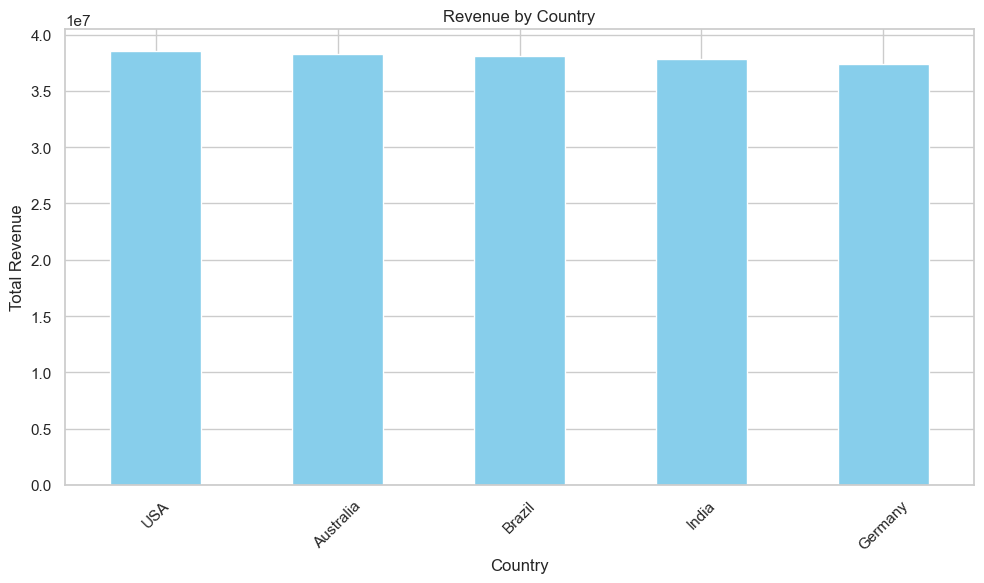

In [39]:
# Visualization: Revenue by Country
plt.figure(figsize=(10, 6))
revenue_by_country.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Revenue by Country")
plt.ylabel("Total Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Revenue by Product Category
revenue_by_category = data.groupby("product_category")["Total Revenue"].sum()
print("\nRevenue by Product Category:")
print(revenue_by_category)


Revenue by Product Category:
product_category
Automotive    64359332.07
Inverter      62680341.14
Solar         63099934.10
Name: Total Revenue, dtype: float64


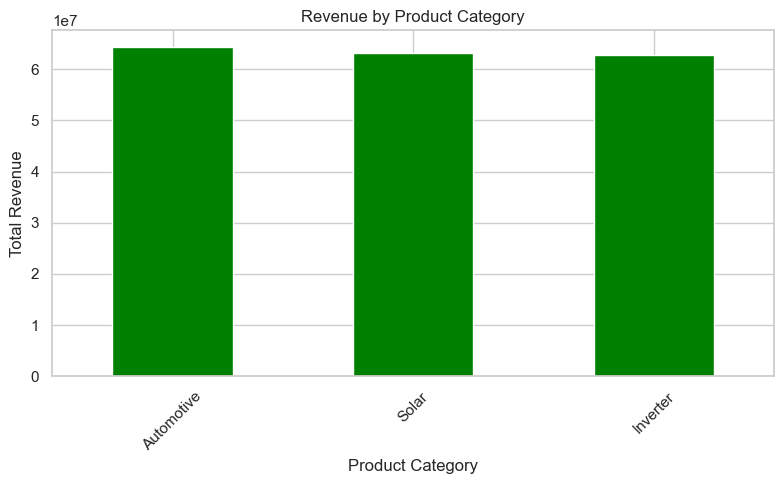

In [41]:
# Visualization: Revenue by Product Category
plt.figure(figsize=(8, 5))
revenue_by_category.sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Units Sold by Battery Type
units_by_battery = data.groupby("battery_type")["units_sold"].sum()
print("\nUnits Sold by Battery Type:")
print(units_by_battery)




Units Sold by Battery Type:
battery_type
Amaron CRUISER    138188
Amaron FLO        136783
Amaron GO         136793
Amaron HI-LIFE    142041
Amaron PRO        138030
Name: units_sold, dtype: int64


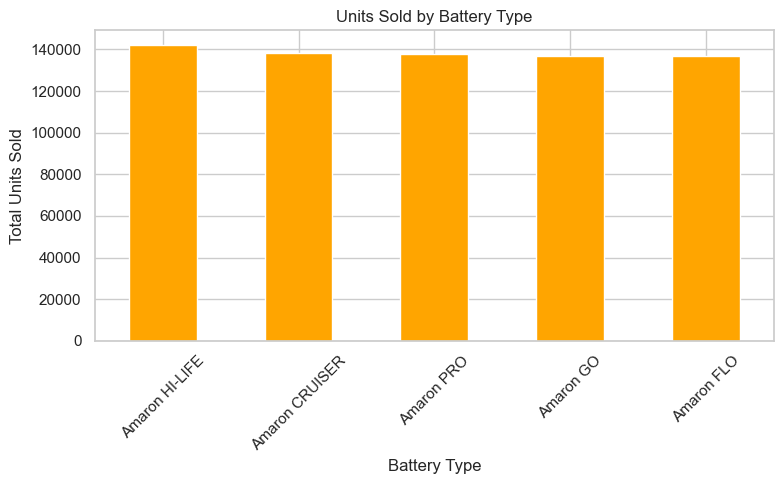

In [43]:
# Visualization: Units Sold by Battery Type
plt.figure(figsize=(8, 5))
units_by_battery.sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Units Sold by Battery Type")
plt.ylabel("Total Units Sold")
plt.xlabel("Battery Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()